# MLP

MLP son las siglas de "Multilayer Perceptron" o "Perceptrón Multicapa". Un perceptrón es la unidad básica de una red neuronal, y es un modelo simple de aprendizaje supervisado. El aprendizaje del perceptrón es supervisado, lo que significa que se entrena utilizando un conjunto de datos etiquetado por lo que durante el entrenamiento, el perceptrón ajusta sus pesos en función de la discrepancia entre la salida predicha y la salida real.


Un MLP es un tipo específico de red neuronal artificial que consiste en al menos tres capas de nodos:

1. **Capa de Entrada (Input Layer):** Representa las características o variables de entrada del modelo. Cada nodo en esta capa corresponde a una característica de entrada.
2. **Capas Ocultas (Hidden Layers):** Estas capas contienen nodos, también llamados neuronas o unidades, que realizan transformaciones no lineales de las entradas. La información fluye desde la capa de entrada a través de estas capas antes de llegar a la capa de salida. La presencia de capas ocultas permite que el MLP aprenda representaciones más complejas y no lineales de los datos.  
3. **Capa de Salida (Output Layer):** Representa las salidas del modelo. La cantidad de nodos en esta capa depende del tipo de problema que estés abordando. Por ejemplo, para problemas de clasificación binaria, podría haber un nodo de salida, mientras que para problemas de clasificación multiclase, podría haber múltiples nodos, uno para cada clase.

### HIPERPARAMETROS
- Cantidad de Épocas:

  Indica cuántas veces se ha pasado por todo el conjunto de entrenamiento durante el entrenamiento del modelo. Se elige de manera que el modelo alcance la convergencia sin sobreajustar o subajustar demasiado.

- Learning Rate (Tasa de Aprendizaje): HIPERPARAMETRO OPTIMIZADOR
- Optimizador
- Funcion de activacion
- Batch
- Arquitectura de la red


### MÉTRICAS

- Accuracy (Precisión)
- Tiempo de Entrenamiento
- F1-score
- Recall(sensibilidad)
- Matriz de confusion



In [ ]:
#Importamos librerias
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import tensorflow as tf
import keras
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

#Definimos una seed aleatoria
np.random.seed(42)
tf.random.set_seed(42)
keras.utils.set_random_seed(51)

Mounted at /content/drive


In [ ]:
# Asignar todos los paths de las carpetas a variables
# Datos de entrenamiento
train_pneumonia_dir = '/content/drive/Shareddrives/IA-Grupo4/5-CNN/ChestXRay/train/PNEUMONIA'
train_normal_dir = '/content/drive/Shareddrives/IA-Grupo4/5-CNN/ChestXRay/train/NORMAL'

# Datos de prueba
test_pneumonia_dir = '/content/drive/Shareddrives/IA-Grupo4/5-CNN/ChestXRay/test/PNEUMONIA'
test_normal_dir = '/content/drive/Shareddrives/IA-Grupo4/5-CNN/ChestXRay/test/NORMAL'

# Datos de validación
val_pneumonia_dir = '/content/drive/Shareddrives/IA-Grupo4/5-CNN/ChestXRay/val/PNEUMONIA'
val_normal_dir = '/content/drive/Shareddrives/IA-Grupo4/5-CNN/ChestXRay/val/NORMAL'

In [ ]:
# Extraer las imágenes de los paths y asignarlas a variables
# Datos de entrenamiento
train_pn = [os.path.join(train_pneumonia_dir, i) for i in os.listdir(train_pneumonia_dir)]
train_nn = [os.path.join(train_normal_dir, i) for i in os.listdir(train_normal_dir)]

# Datos de prueba
test_pn = [os.path.join(test_pneumonia_dir, i) for i in os.listdir(test_pneumonia_dir)]
test_nn = [os.path.join(test_normal_dir, i) for i in os.listdir(test_normal_dir)]

# Datos de validación
val_pn = [os.path.join(val_pneumonia_dir, i) for i in os.listdir(val_pneumonia_dir)]
val_nn = [os.path.join(val_normal_dir, i) for i in os.listdir(val_normal_dir)]

# Explorar el número total de imágenes
Total_images = len(train_pn + train_nn + test_pn + test_nn + val_pn + val_nn)
Total_pneumonia = len(train_pn + test_pn + val_pn)
Total_normal = len(train_nn + test_nn + val_nn)

print('El número total de imágenes es', Total_images)
print('El número total de imágenes de neumonía es', Total_pneumonia)
print('El número total de imágenes normales es', Total_normal)

train_set = train_pn + train_nn
test_set = test_pn + test_nn
val_set = val_pn + val_nn

El número total de imágenes es 5856
El número total de imágenes de neumonía es 4273
El número total de imágenes normales es 1583


##Preprocesado de las imágenes

In [ ]:
def preprocess_image(image_paths, image_size=(28, 28), num_channels=1):
    images = []
    labels = []

    for img_path in image_paths:
        # Asumimos que la etiqueta está en el nombre del archivo o en su directorio
        label = 1 if 'PNEUMONIA' in img_path else 0  # 1 para 'PNEUMONIA', 0 para 'NORMAL'
        img = Image.open(img_path).convert('L' if num_channels == 1 else 'RGB')
        img = img.resize(image_size)
        img_array = np.asarray(img) / 255.0  # Normalizar a [0, 1]

        # Aplanar las imágenes para que sean adecuadas para un MLP
        img_array = img_array.flatten()

        images.append(img_array)
        labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [ ]:
# Preprocesar los conjuntos de datos
X, y = preprocess_image(train_set)
A, b = preprocess_image(test_set)
C, d = preprocess_image(val_set)

num_classes = 2  # Suponiendo que tienes dos clases: 'PNEUMONIA' y 'NORMAL'

y = tf.keras.utils.to_categorical(y, num_classes=num_classes)
b = tf.keras.utils.to_categorical(b, num_classes=num_classes)
d = tf.keras.utils.to_categorical(d, num_classes=num_classes)

##Arquitectura del modelo

In [ ]:
input_shape = (28 * 28 * 1,)  # Imágenes de 28x28 aplanadas

model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=input_shape), #784x16= 12544 conexiones con 16 bias
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'), #16x8= 128 conexiones
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8, activation='relu'), #32 conexiones
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    #12732 valores en total
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Para clasificación multi-clase
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,742 (49.77 KB)

 Trainable params: 12,742 (49.77 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento

In [ ]:
history = model.fit(X, y, epochs=10, validation_data=(C, d))

# Evaluar el modelo en el set de test
test_loss, test_acc = model.evaluate(A, b)
print(f'Accuracy en el conjunto de test: {test_acc}')

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7370 - loss: 0.5345 - val_accuracy: 0.5625 - val_loss: 0.7511
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8555 - loss: 0.3578 - val_accuracy: 0.5625 - val_loss: 0.7627
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8669 - loss: 0.3304 - val_accuracy: 0.6875 - val_loss: 0.6989
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8790 - loss: 0.2852 - val_accuracy: 0.8125 - val_loss: 0.3634
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.2803 - val_accuracy: 0.8125 - val_loss: 0.4621
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8863 - loss: 0.2684 - val_accuracy: 0.5625 - val_loss: 0.8004
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8828 - loss: 0.2735 - val_accuracy: 0.9375 - val_loss: 0.3164
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - loss: 0.2881 - val_accuracy: 0.

## Resultados

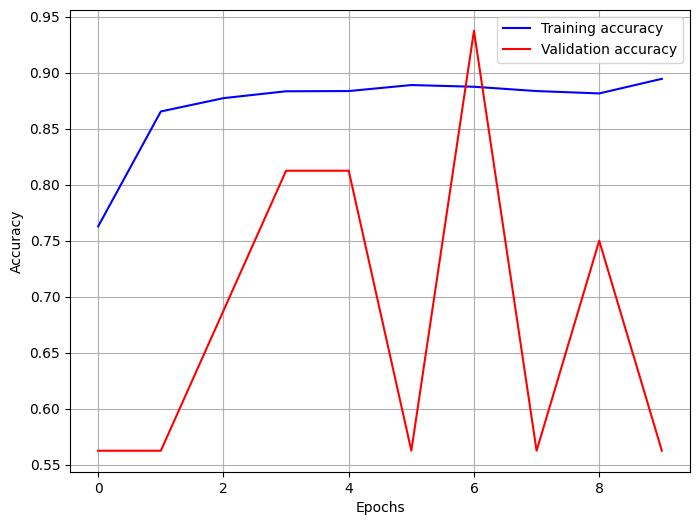

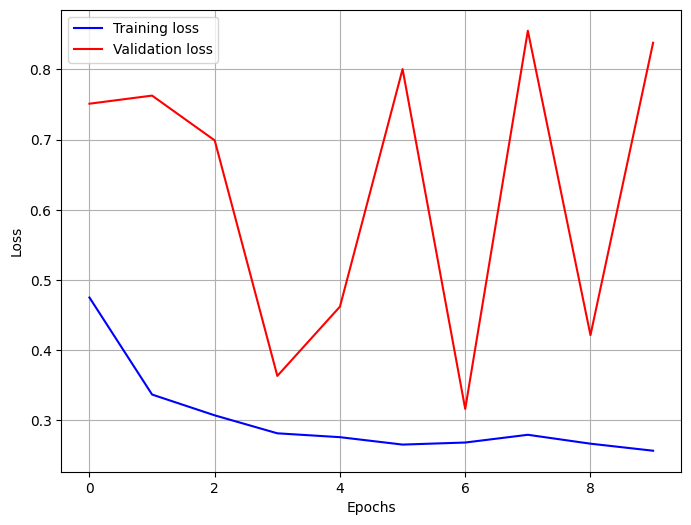

In [ ]:
def plot_graphs(history, metric):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history[metric], color='blue', label=f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], color='red', label=f'Validation {metric}')
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar precisión y pérdida
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


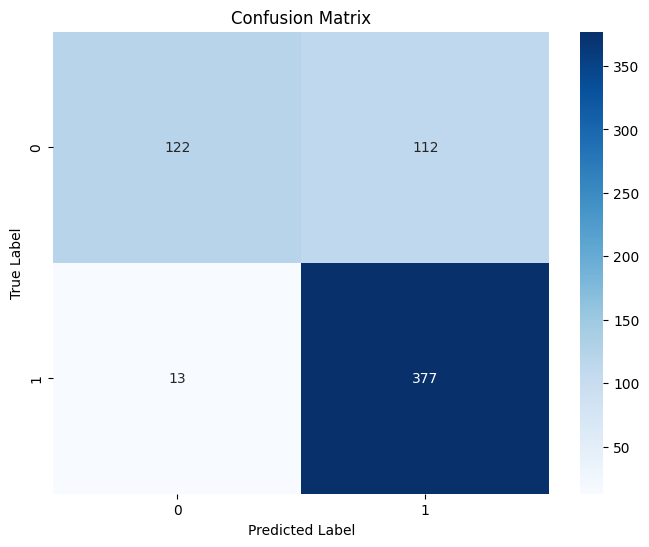

In [ ]:
# Obtener predicciones en el set de test
y_pred = model.predict(A)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(b, axis=1)

# Generar matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def calculate_metrics(y_true, y_pred_classes):
    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')

    # Mostrar resultados
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Reporte de clasificación
    report = classification_report(y_true, y_pred_classes)
    print("\nClassification Report:")
    print(report)

# Calcular métricas en el conjunto de prueba
calculate_metrics(y_true, y_pred_classes)

Accuracy: 0.7997
Precision: 0.8207
Recall: 0.7997
F1 Score: 0.7841

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       234
           1       0.77      0.97      0.86       390

    accuracy                           0.80       624
   macro avg       0.84      0.74      0.76       624
weighted avg       0.82      0.80      0.78       624

